# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數

之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# 生成數據
x = np.linspace(0, 5, 50)
y = 1.2 * x + 0.8 + 0.6 * np.random.randn(50)
print(f'x: {x}')
print("==================")
print(f'y: {y}')

x: [0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
y: [0.8269398  0.96125485 1.11564079 1.95351363 1.43441378 0.07439754
 2.04658644 2.48297966 0.87864092 2.03221175 2.11341096 1.67654908
 3.1218162  2.07598438 2.19309823 1.31168542 2.49466763 2.79765057
 3.47246836 2.49915428 3.79664902 3.07293347 3.4794463  3.49400837
 3.89973761 2.67676373 3.67003615 2.10181455 3.24924345 4.62447911
 4.80680442 5.59092561 4.73537386 4.98373755 6.00290845 5.82521084
 5.19233234 6.06786288 5.7121708

In [4]:
# 分割數據
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train)
print(y_train)

[1.2244898  0.40816327 3.7755102  0.81632653 0.30612245 0.6122449
 4.18367347 4.69387755 4.79591837 1.53061224 0.91836735 1.63265306
 2.44897959 3.46938776 3.16326531 0.         4.48979592 2.75510204
 3.36734694 0.51020408 2.95918367 1.12244898 3.67346939 0.10204082
 2.14285714 0.20408163 4.3877551  3.57142857 2.34693878 4.08163265
 1.02040816 2.24489796 1.83673469 5.         2.04081633 0.71428571
 4.28571429 1.42857143 2.85714286 3.87755102]
[3.1218162  1.43441378 6.06786288 0.87864092 1.95351363 2.04658644
 5.96039418 5.89558588 6.26933434 1.31168542 2.03221175 2.49466763
 3.89973761 6.00290845 5.59092561 0.8269398  5.26327461 2.10181455
 4.98373755 0.07439754 4.62447911 1.67654908 5.19233234 0.96125485
 3.07293347 1.11564079 6.01414654 5.82521084 3.49400837 5.36659116
 2.11341096 3.4794463  3.47246836 6.44404864 3.79664902 2.48297966
 6.50652055 2.19309823 3.24924345 5.71217082]


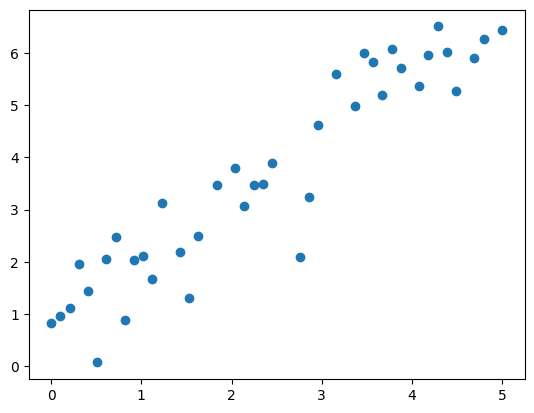

In [5]:
# 繪製訓練數據
plt.scatter(x_train, y_train)
plt.show()

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [6]:
# 1D轉2D
x_train_reshaped = x_train.reshape(-1,1)

In [7]:
# 訓練模型
regr = LinearRegression()
regr.fit(x_train_reshaped,y_train)

LinearRegression()

In [8]:
# y = wx + b
# 印出w(斜率)及b(截距)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.19011959]
interception:  0.7985567525427317


In [9]:
# 預測訓練數據
y_train_predict = regr.predict(x_train_reshaped)

In [10]:
# 計算MSE評估模型
mse_train = np.sum((y_train_predict-y_train)**2) / len(y_train)
print(mse_train)

0.4452634415984919


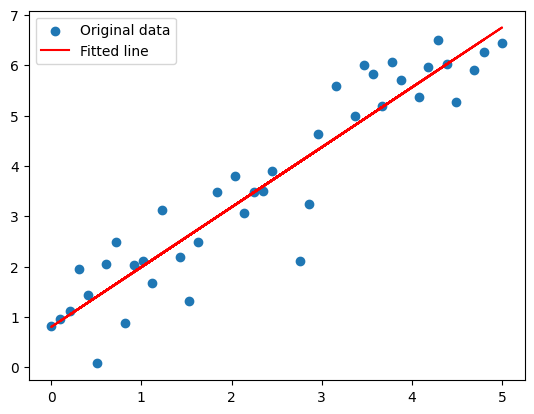

In [11]:
# 繪製原始數據和預測結果
plt.scatter(x_train, y_train, label='Original data') # 原始數據
plt.plot(x_train, y_train_predict, 'r', label='Fitted line') # 預測數據
plt.legend()
plt.show()

#### test with test data

In [12]:
# 1D轉2D
x_test_reshaped = x_test.reshape(-1,1)

# 預測測試數據
y_test_predict = regr.predict(x_test_reshaped)
print(y_test_predict)

[2.37728682 5.53474697 4.44177999 6.26339161 2.86304992 6.62771394
 3.95601689 3.83457612 4.68466154 3.10593147]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [13]:
# Y = WX + b
# 用公式計算預測測試數據
W = regr.coef_
b = regr.intercept_
W * x_test_reshaped + b

array([[2.37728682],
       [5.53474697],
       [4.44177999],
       [6.26339161],
       [2.86304992],
       [6.62771394],
       [3.95601689],
       [3.83457612],
       [4.68466154],
       [3.10593147]])

In [14]:
# 計算測試數據的均方誤差
mse_test = np.sum((y_test_predict-y_test)**2) / len(y_test)
print(mse_test)

0.3109152973137017


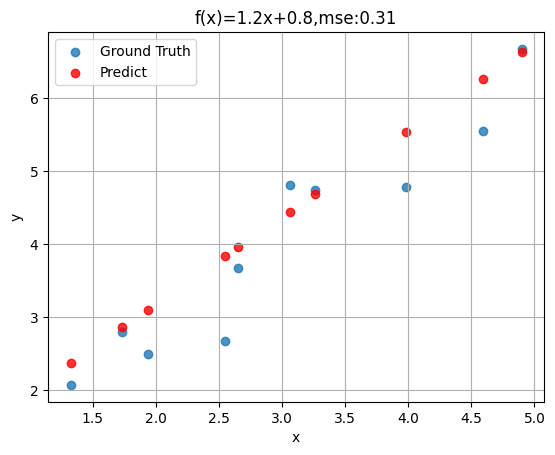

In [15]:
# 繪製測試數據和預測數據的差異
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse_test,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, y_test_predict, c='r', alpha=0.8,label='Predict')
plt.legend()
plt.show()